In [1]:
import time

import numpy as np
from sklearn.model_selection import train_test_split

import shap

import pandas as pd

data = pd.read_csv('./data1.csv')
print(data.columns)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


y = data.C

base_features = [c for c in data.columns if c != "C"]

X = data[base_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_summary = shap.kmeans(X_train, 10)
X50 = shap.utils.sample(X, 50)

print(X_train[:10])


def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Index(['P', 'D', 'I', 'T', 'C'], dtype='object')
         P     D      I     T
73   13.83  6.22  11.09  4.11
306  13.67  5.40  11.39  3.51
297  12.77  3.46  11.40  3.59
161  10.96  4.73  10.79  4.15
308  12.46  3.14  11.08  3.63
29   12.34  4.65  10.77  4.03
258  11.77  4.53  10.90  3.93
20   12.70  5.17  11.51  3.49
46   11.71  3.78  10.95  3.94
176  11.85  4.92  11.01  3.71


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [2]:
print(X_train_summary.data.shape)
print(X50[:5])

(10, 4)
         P     D      I     T
65   13.48  7.50  11.36  3.65
253  14.45  6.36  11.94  3.92
208  12.09  4.73  11.06  3.64
156  12.97  5.34  11.18  4.19
108  12.24  5.07  10.99  4.16


In [3]:

from sklearn import linear_model

lin_regr = linear_model.LinearRegression()
result=lin_regr.fit(X_train, y_train)

print_accuracy(lin_regr.predict)


Root mean squared test error = 0.6760506496795923


In [4]:
lin_regr.score(X_test, y_test)

0.40429965355456265

In [5]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", lin_regr.coef_[i].round(5))

Model coefficients:

P = 0.772
D = -0.12368
I = -0.0672
T = -0.18199


In [6]:
print(lin_regr.predict(X_test))
print(lin_regr.predict(X_test).shape)

[7.70679175 8.50850735 6.99827333 7.49403287 6.98209331 7.37788749
 7.1141243  7.84331523 7.48174147 6.96465018 8.51595461 7.44543001
 4.80139948 5.9634126  6.85828872 8.44137189 7.893456   6.88392348
 7.7775173  7.75673366 6.3174283  8.70193837 8.7851207  7.85508252
 7.91942081 7.92524481 7.45788678 7.12589883 5.52590862 7.34274855
 7.50258622 7.69004876 7.65235897 7.72004481 8.40784331 7.52461371
 7.15742439 7.54021288 8.0369329  7.14123132 7.54075766 8.07375025
 7.48598683 7.48154574 7.88261391 7.81466456 5.32028672 7.99568101
 7.59517909 7.91920273 7.18783866 6.70222531 7.10956771 4.89908985
 7.35826885 7.5857499  7.31993463 6.74252403 6.53903573 6.9800978
 8.25818861 7.25080656 7.57025273 8.0545771  6.9988788  8.03085559
 7.81151123 7.31851971 8.1568537  7.02562162 6.76520955 7.75474812
 7.59195946 7.40814593 6.80109096 6.47988093 5.88239913 8.2611163
 6.77879329]
(79,)


In [7]:
print(y_test.shape)
print(y_test)

(79,)
65     8.16
253    8.56
208    7.96
156    7.05
108    7.44
       ... 
188    8.32
103    5.46
159    8.42
90     8.23
129    6.31
Name: C, Length: 79, dtype: float64


TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

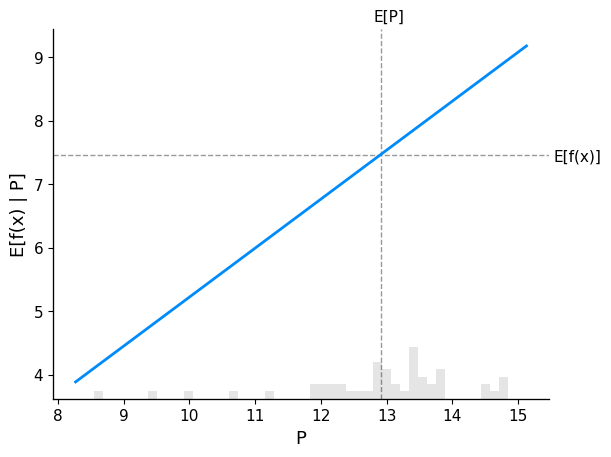

In [8]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(lin_regr.predict, X50)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 0
shap.partial_dependence_plot(
    "P",
    lin_regr.predict,
    X50,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

In [ ]:
print(X_test.iloc[10, :])

P    14.48
D     6.44
I    11.16
T     4.24
Name: 26, dtype: float64


In [ ]:
shap.initjs()
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[10])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[10, :])



In [ ]:
shap_values1 = ex.shap_values(X_test.iloc[1, :])
shap.force_plot(ex.expected_value, shap_values1, X_test.iloc[1, :])

  0%|          | 0/79 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


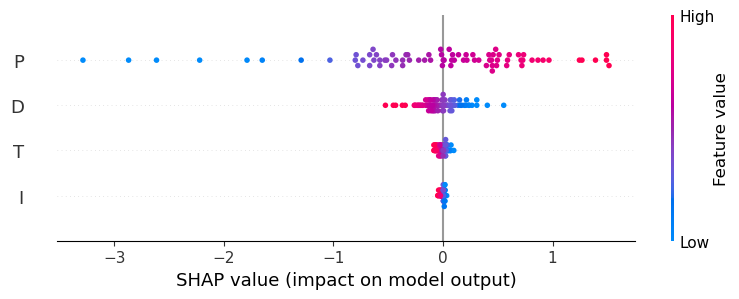

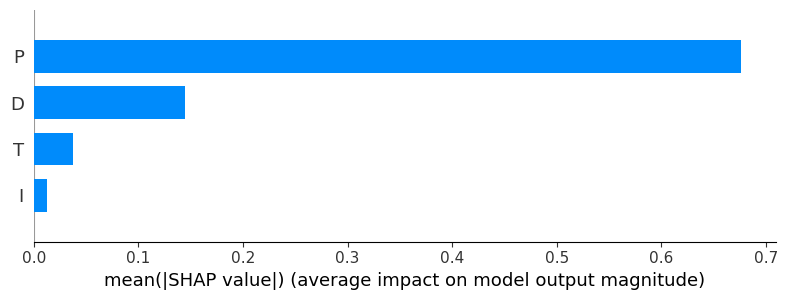

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


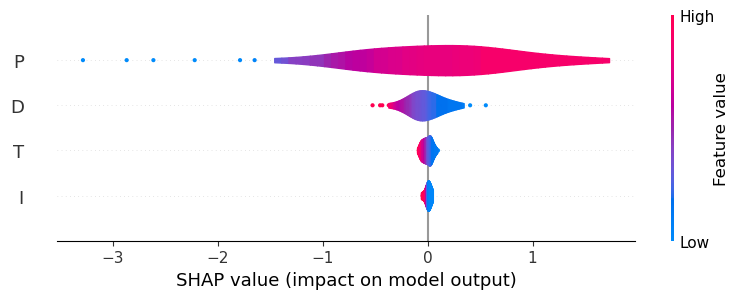

In [ ]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test,plot_type="bar", show=True)
shap.summary_plot(shap_values, X_test,plot_type="violin")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

mymodel = RandomForestRegressor(max_depth=10, n_estimators=200,random_state=1).fit(X_train, y_train)
mymodel.fit(X_train, y_train)

print_accuracy(mymodel.predict)


Root mean squared test error = 0.5433736882570841


In [ ]:
print(mymodel.predict(X_test)[:5])
print(X_test.iloc[0, :])

[8.43238775 6.97236308 7.49577895 9.3711     6.91528683]
P    13.48
D     7.50
I    11.36
Name: 65, dtype: float64


In [ ]:
shap.initjs()

ex = shap.KernelExplainer(mymodel.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0, :])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0, :])

  0%|          | 0/79 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


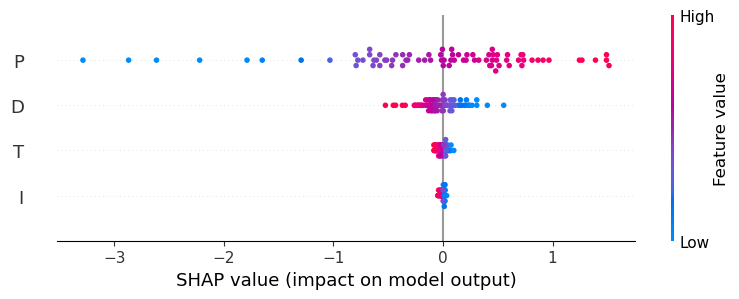

In [ ]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# 创建模型
rf = RandomForestRegressor(random_state=1)

# 使用网格搜索
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 拟合网格搜索模型
grid_search.fit(X_train, y_train)

# 打印最佳参数
print(grid_search.best_params_)

# 使用最佳参数的模型来预测和评估
best_model = grid_search.best_estimator_
print_accuracy(best_model.predict)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, 


216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lxh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lxh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/lxh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/lxh/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraint

In [ ]:
print(best_model)

RandomForestRegressor(max_depth=10, max_features='auto', n_estimators=200,
                      random_state=1)


In [ ]:
print_accuracy(best_model.predict)

Root mean squared test error = 0.5440784209523973


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    # 自定义学习率调度规则
    initial_lr = 0.1
    decay_factor = 0.8
    decay_steps = 10
    return initial_lr * decay_factor**(epoch / decay_steps)

# 创建 LearningRateScheduler 回调
lr_scheduler = LearningRateScheduler(lr_schedule)


# 假设 X_train 和 y_train 已经是预处理好的训练数据和标签
# 创建归一化层
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(X_train)


# 定义模型结构
model = Sequential([
#    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # 输入层及第一隐藏层，64个神经元
    normalizer,
    Dense(64, activation='relu'),  # 第二隐藏层，64个神经元
#    Dense(64, activation='relu'),  # 第三隐藏层，64个神经元
    Dense(1)  # 输出层，对于回归问题，通常只有一个神经元且不使用激活函数
])

# 编译模型并训练
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[lr_scheduler])
#model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
#model.fit(X_train, y_train, epochs=98, validation_split=0.2)

# 评估模型
val_mse, val_mae = model.evaluate(X, y, verbose=0)
print(f'MSE: {val_mse}, MAE: {val_mae}')

# 使用模型进行预测
predictions = model.predict(X_test)

Epoch 1/200
6/6 [==============================] - 1s 52ms/step - loss: 21.0238 - mae: 3.7664 - val_loss: 2.7853 - val_mae: 1.2535 - lr: 0.1000
Epoch 2/200
6/6 [==============================] - 0s 21ms/step - loss: 5.1549 - mae: 1.8222 - val_loss: 5.0654 - val_mae: 2.0465 - lr: 0.0978
Epoch 3/200
6/6 [==============================] - 0s 22ms/step - loss: 2.9329 - mae: 1.3960 - val_loss: 1.6726 - val_mae: 1.0312 - lr: 0.0956
Epoch 4/200
6/6 [==============================] - 0s 17ms/step - loss: 2.0501 - mae: 1.1451 - val_loss: 1.8987 - val_mae: 1.2198 - lr: 0.0935
Epoch 5/200
6/6 [==============================] - 0s 28ms/step - loss: 1.3495 - mae: 0.9325 - val_loss: 1.0735 - val_mae: 0.8357 - lr: 0.0915
Epoch 6/200
6/6 [==============================] - 0s 33ms/step - loss: 0.9254 - mae: 0.6378 - val_loss: 0.5265 - val_mae: 0.4493 - lr: 0.0894
Epoch 7/200
6/6 [==============================] - 0s 22ms/step - loss: 0.6243 - mae: 0.5590 - val_loss: 0.3119 - val_mae: 0.4181 - lr: 0.087

In [ ]:
print(predictions[:10])
print(y_test[:10])

[[7.7274585]
 [8.031632 ]
 [7.258859 ]
 [9.992119 ]
 [6.798909 ]
 [6.9014716]
 [6.7972345]
 [7.873069 ]
 [7.3916836]
 [6.7003593]]
65     8.16
313    6.51
150    7.43
158    9.85
108    7.44
275    6.31
135    6.87
116    8.74
74     7.54
262    6.81
Name: C, dtype: float64


In [ ]:
print((predictions[:10]).reshape(-1))
print(type(y_test))
print(y_test.tolist()[:10])
#todo: print and y_test horizontally




[7.7274585 8.031632  7.258859  9.992119  6.798909  6.9014716 6.7972345
 7.873069  7.3916836 6.7003593]
<class 'pandas.core.series.Series'>
[8.16, 6.51, 7.43, 9.85, 7.44, 6.31, 6.87, 8.74, 7.54, 6.81]


In [ ]:
print(model.predict(X_test).reshape(79,))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[7.1368766 7.4927807 6.8411517 6.6843233 6.8401027 7.8334236 7.2147136
 6.754084  6.6756234 7.035543  7.7132373 7.134934  7.0791883 7.738988
 6.504044  7.4954643 8.695051  7.650947  6.6842113 7.1820364 7.094126
 6.8748317 8.644911  8.354993  7.3507595 6.671842  7.5250683 6.8214107
 7.296642  7.5707946 7.52775   7.48226   7.6779532 7.099671  7.067465
 8.482325  6.983492  4.602725  6.180683  7.4277864 8.1721325 7.216852
 7.154082  7.329064  7.425174  8.265781  7.577265  7.272137  5.609018
 7.319329  6.9782877 8.041401  7.146513  7.9830303 7.916034  7.3227053
 7.105871  7.2763906 7.036286  7.4353447 7.435214  8.211947  8.050959
 7.5543165 5.858357  6.5826917 6.3760037 7.561439  6.745015  7.316607
 7.5784726 7.0014653 7.4292436 7.876845  7.4871163 7.564297  6.830342
 6.67611   6.804614 ]


In [ ]:
def print_nnaccuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test).reshape(79,) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
print(model.predict(X_test))

In [ ]:
print_nnaccuracy(model.predict)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Root mean squared test error = 0.4980368268257535


In [ ]:
print(y_test)

80     6.62
268    7.87
310    6.96
187    6.54
105    7.45
       ... 
158    7.43
139    8.58
39     6.81
188    8.32
78     7.63
Name: C, Length: 79, dtype: float64


In [ ]:
shap.initjs()

ex = shap.KernelExplainer(model.predict, X_test)
shap_values = ex.shap_values(X_test.iloc[0, :])
shap.force_plot(ex.expected_value[1], shap_values[1], X_test.iloc[0, :])

35/35 [==============================] - 0s 3ms/step


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
!pip list |grep tensor


safetensors                       0.4.2


In [ ]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 406.5/406.5 kB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 MB 3.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 67.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 34.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 9.2 MB/s eta 0:00